In [6]:
!pip install ultralytics opencv-python-headless matplotlib


In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Example path to dataset:
# /content/drive/MyDrive/Kidney_dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt


In [9]:
# Verify folder structure
base_path = "/content/drive/MyDrive/Kidney_dataset"

!ls {os.path.join(base_path, 'train/images')}
!ls {os.path.join(base_path, 'train/labels')}
!ls {os.path.join(base_path, 'val/images')}
!ls {os.path.join(base_path, 'val/labels')}
!ls {os.path.join(base_path, 'test/images')}
!ls {os.path.join(base_path, 'test/labels')}


1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.269520bcaab75e008e00f57f3fa98851.jpg
1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.74493ef7bdab6de49e88f708a5745000.jpg
1-3-46-670589-33-1-63700700750059521800001-5070347181582747136_png_jpg.rf.1caafe96658dc8bfb7dfe174ef751da3.jpg
1-3-46-670589-33-1-63700700750059521800001-5070347181582747136_png_jpg.rf.b97e32ed8347d9de676a821b992e9e50.jpg
1-3-46-670589-33-1-63700700750188529100001-5659992199131706929_png_jpg.rf.20fb68d8630e3526b4e7e5c8198277cc.jpg
1-3-46-670589-33-1-63700700750188529100001-5659992199131706929_png_jpg.rf.32f57db5f742576e560a82af2a4666e7.jpg
1-3-46-670589-33-1-63700780314615924400001-4656503585389726474_png_jpg.rf.bb783428cbaeb76974585af0199b3c8b.jpg
1-3-46-670589-33-1-63700780314615924400001-4656503585389726474_png_jpg.rf.d4e842e4f0d5ca66addcadd37aa3e49d.jpg
1-3-46-670589-33-1-63700780314684928300001-5742750080979711739_png_jpg.rf.31342c0c88a6b9023ec894067c7aaede.jpg
1

In [10]:
# Use YOLOv8 Nano for fast training on Colab
model = YOLO("yolov8n.pt")


In [11]:
import yaml
import os

# Define the paths for your dataset
data = {
    'path': base_path, # Root directory of the dataset
    'train': 'train', # Path to train folder containing 'images' and 'labels' subfolders
    'val': 'valid',     # Corrected path to valid folder containing 'images' and 'labels' subfolders
    'test': 'test',   # Path to test folder containing 'images' and 'labels' subfolders
    'nc': 1,  # Number of classes
    'names': ['kidney_stone']  # Class names
}

# Write the data to a YAML file
with open('data.yaml', 'w') as f:
    yaml.dump(data, f)

print("data.yaml created successfully:")
!cat data.yaml

model.train(
    data="data.yaml",
    epochs=50,
    imgsz=512,
    batch=8,
    project="runs/train",
    name="kidney_stone_detect"
)

data.yaml created successfully:
names:
- kidney_stone
nc: 1
path: /content/drive/MyDrive/Kidney_dataset
test: test
train: train
val: valid
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=kidney_stone_detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ace38347860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [12]:
import os

val_labels_path = os.path.join(base_path, 'valid/labels')
num_val_labels = len(os.listdir(val_labels_path))

print(f"Number of label files in {val_labels_path}: {num_val_labels}")

if num_val_labels == 0:
    print("Warning: The 'val/labels' directory appears to be empty. Ultralytics requires label files for training and validation.")


Number of label files in /content/drive/MyDrive/Kidney_dataset/valid/labels: 123


In [13]:
import os
from ultralytics import YOLO # Import YOLO class

# Define base_path for consistent access
base_path = "/content/drive/MyDrive/Kidney_dataset"

# Instantiate the model again to ensure it's defined
model = YOLO("yolov8n.pt")

# Pick one test image
test_image = os.path.join(base_path, "test/images/test_image.jpg")

# Run detection
results = model(test_image, show=True)  # displays image with detections

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/Kidney_dataset/test/images/test_image.jpg: 448x512 3 kidney_stones, 39.0ms
Speed: 2.1ms preprocess, 39.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 512)


In [14]:
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()  # bounding boxes
    print(f"Detected {len(boxes)} kidney stones in the image")


Detected 3 kidney stones in the image


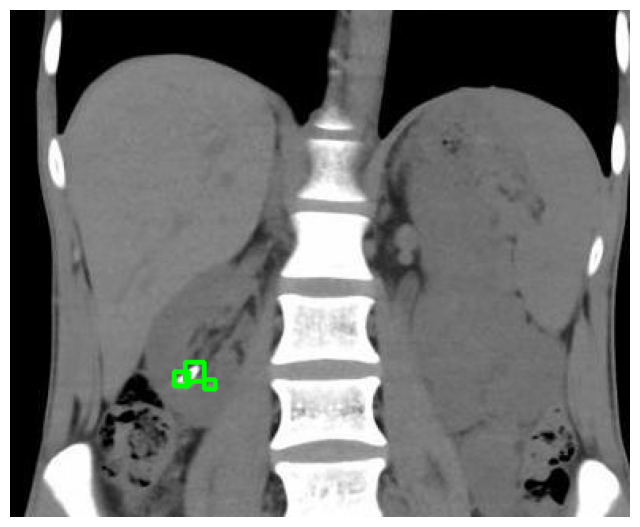

In [15]:
img = cv2.imread(test_image)

for box in boxes:
    x1, y1, x2, y2 = map(int, box[:4])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
